<a href="https://colab.research.google.com/github/tigrannh/Data-Science-ML-projects/blob/main/LDA_and_SVM_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LDA and QDA

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') # Plot style
plt.rcParams['figure.figsize'] = (10.0, 8.0)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Complete the `BinaryLDA` class in `Courses/MachineLearning/Labs/Lab_files/Lab2/discriminants.py` script.

First, we will use the toy dataset from the last lab to see if this algorithm is able to separate this data.

In [ ]:
x1 = np.array([5, 6, 7, 7, 8, 9, 0, 1, 2, 4, 5, 6])
x2 = np.array([2, 1, 3, 5, 10, 3, 4, 8, 6, 10, 9, 11])
y = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
data.head()

,x1,x2,y
0,5,2,1
1,6,1,1
2,7,3,1
3,7,5,1
4,8,10,1


In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

In [ ]:
from discriminants import BinaryLDA

In [ ]:
model = BinaryLDA()
model.fit(X, y)

Now we have the fitted values for `w` and `t`, which we will use to visualize the decision boundary.

In [ ]:
def plot_data(data): 
  plt.figure(figsize=(8, 6))
  plt.plot(data.loc[data.y==1, 'x1'], data.loc[data.y==1, 'x2'],
          'ro' , label='positives') 
  plt.plot(data.loc[data.y==0, 'x1'], data.loc[data.y==0, 'x2'],
          'bo' , label='negative') 

  min_x1 = np.min(data['x1'])
  max_x1 = np.max(data['x1'])
  min_x2 = np.min(data['x2'])
  max_x2 = np.max(data['x2'])

  plt.legend(markerscale=1, loc='upper left', 
            frameon=True, shadow=True, fontsize=12)

  plt.xticks(list(range(min_x1-1, max_x2+2)))
  plt.yticks(list(range(min_x2-1, max_x2+2)))
  plt.xlim(min_x1-1, max_x1+1)
  plt.ylim(min_x1-1, max_x2+1)

  plt.xlabel('$x_1$', size=12)
  plt.ylabel('$x_2$', size=12)

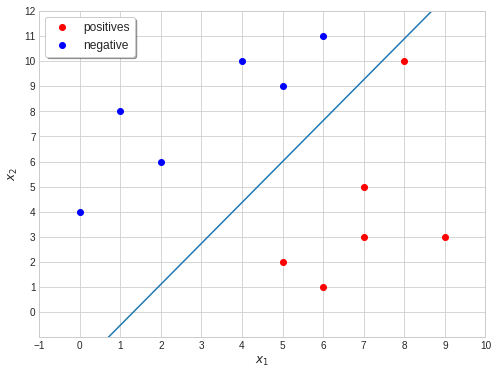

In [ ]:
plot_data(data)
w = model.w
t = model.t 
x = np.arange(-5,15)
plt.plot(x, -w[0] / w[1] * x + t / w[1])
plt.show()

We can see that the separating line was found with the `BinaryLDA` algorithm on this dataset. Now let's write the LDA algorithm for general case, when the class labels can be more than 2. 

Complete the `LDA` class in the same script. We will create another synthetic dataset to check the performance of the model.

In [ ]:
def synthetic_dataset():
    '''Generate 3 Gaussian samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(0)
    cov1 = np.array([[1, -1],
                     [-1, 2]])
     
    cov2 = np.array([[0.5, 0.2],
                     [0.2, 0.5]])
    
    cov3 = np.array([[2, -0.5],
                     [-0.5, 0.2]])

    # inputs
    X = np.vstack((np.random.multivariate_normal(mean=[0, 0], cov=cov1, size=n),
                   np.random.multivariate_normal(mean=[2, 2], cov=cov2, size=n),
                   np.random.multivariate_normal(mean=[-3, 3], cov=cov3, size=n)
                   ))
    # labels 0, 1, 2
    y = np.hstack((np.zeros(n), np.ones(n), np.ones(n) * 2))

    return X, y

def plot_data2(X, y, y_pred):

    tp = (y == y_pred)  # True Positive (predicted correctly)
    tp0, tp1, tp2 = tp[y == 0], tp[y == 1], tp[y == 2]
    X0, X1, X2 = X[y == 0], X[y == 1], X[y == 2]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]
    X2_tp, X2_fp = X2[tp2], X2[~tp2]

    # class 0: 
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.',
                color='red', label='Class 0')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x',
                s=30, color='#990000')  # dark red

    # class 1: 
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.',
                color='blue', label='Class 1')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=30, color='#000099')  # dark blue
    
    # class 3: 
    plt.scatter(X2_tp[:, 0], X2_tp[:, 1], marker='.',
                color='green', label='Class 2')
    plt.scatter(X2_fp[:, 0], X2_fp[:, 1], marker='x',
                s=30, color='#009900')  # dark green

In [ ]:
Xs, ys = synthetic_dataset()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xs, ys,
                                                    test_size=0.25,
                                                    random_state=0)

In [ ]:
from discriminants import LDA
start = time.perf_counter()
model = LDA()
model.fit(X_train, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')
predictions = model.predict(X_test)
accuracy_score(predictions, y_test)

Time taken: 0.005468138999276562 sec


0.9422222222222222

If you've done everything correctly you will get around $94\%$ accuracy on this dataset. We can also view the predictions, the wrong classified points are marked with 'x's. By the way, you can modify your code so that the decision boundaries can be visualized after model fitting.

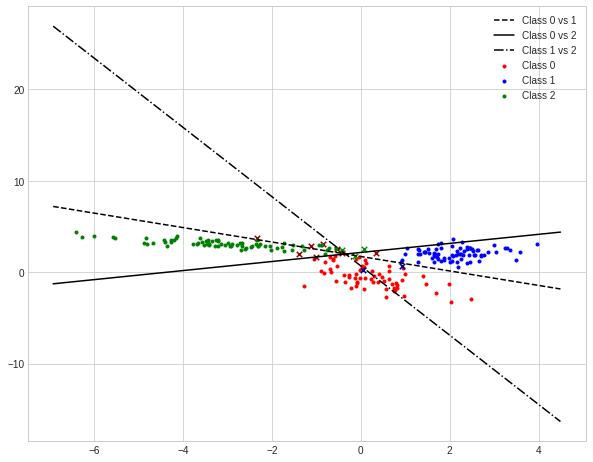

In [ ]:
from itertools import combinations
linestyles = ['k--', 'k-', 'k-.']
plot_data2(X_test, y_test, predictions)
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x = np.linspace(x_min, x_max)
for idx, [i, j] in enumerate(combinations(np.arange(3), 2)):
  w1 = model.delta[i][0]
  t1 = model.delta[i][1]
  w2 = model.delta[j][0]
  t2 = model.delta[j][1]
  w = w1 - w2
  t = t1 - t2
  plt.plot(x, -w[0] / w[1] * x + t / w[1], linestyles[idx],
           label=f'Class {i} vs {j}')
plt.legend();

Complete the QDA class in the same script and check it's performance on the same dataset. You will get about $96\%$ accuracy.

In [ ]:
from discriminants import QDA
model = QDA()
start = time.perf_counter()
model.fit(X_train, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')
predictions2 = model.predict(X_test)
accuracy_score(predictions2, y_test)

Time taken: 0.0059526540026126895 sec


0.9644444444444444

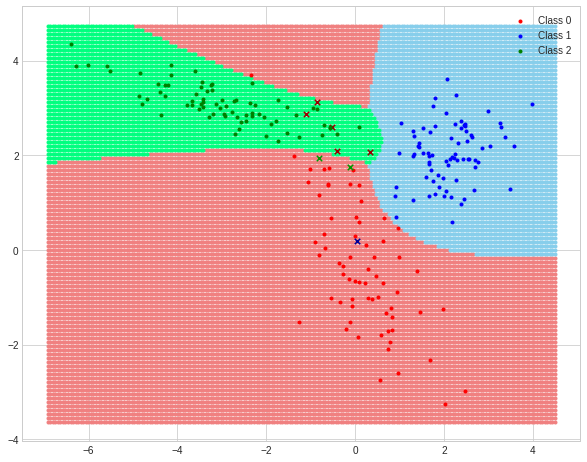

In [ ]:
nx, ny = 200, 100
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))

x_input = np.c_[xx.ravel(), yy.ravel()]
preds = model.predict(x_input)

plt.scatter(x_input[preds==0, 0], x_input[preds==0, 1], marker='.',
            color='lightcoral')

plt.scatter(x_input[preds==1, 0], x_input[preds==1, 1], marker='.',
            color='skyblue')

plt.scatter(x_input[preds==2, 0], x_input[preds==2, 1], marker='.',
            color='springgreen')

plot_data2(X_test, y_test, predictions2)

plt.legend();

It's always good to make sure we have implemented everything correctly by comparing our results against `sklearn`'s implementation.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [ ]:
start = time.perf_counter()
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')
predictions = model.predict(X_test)
accuracy_score(predictions, y_test)

Time taken: 0.0028322349971858785 sec


0.9422222222222222

In [ ]:
start = time.perf_counter()
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')
predictions = model.predict(X_test)
accuracy_score(predictions, y_test)

Time taken: 0.0012739030025841203 sec


0.9644444444444444

## KNN vs LDA, QDA

In this task we will compare KNN algorithm against LDA, QDA algorithms on the classical "wine" [dataset](https://scikit-learn.org/stable/datasets/index.html#wine-dataset) from sklearn datasets. 

In [ ]:
from sklearn import datasets
wine = datasets.load_wine()

# wine.data contains numpy array of dataset input features
# wine.target contains labels of instances
# wine.feature_names contains features labels

wine_train = pd.DataFrame(columns=wine['feature_names'], data=wine['data'])
display(wine_train.head())

print(f"number of features : {len(wine['feature_names'])}")
print(f"number of classes : {len(wine['target_names'])}")

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


number of features : 13
number of classes : 3


Let's split the dataset into $80\%$ training data and $20\%$ test data using random seed = 22, and report the number of instances in the training set and in the test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(wine_train, wine['target'],
                                                    test_size=0.2,
                                                    random_state=22)
print(f"train set size : {len(y_train)}")
print(f"test set size : {len(y_test)}")

train set size : 142
test set size : 36


First, we will use the KNN Classifier from Sklearn to fit a model for different values of K $(3, 5, 7)$. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
for k in [1,3,5,7]:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  print(f"""
  k = {k}, accuracy = {accuracy_score(y_test,knn.predict(X_test))*100}%
  """)


  k = 1, accuracy = 75.0%
  

  k = 3, accuracy = 66.66666666666666%
  

  k = 5, accuracy = 69.44444444444444%
  

  k = 7, accuracy = 66.66666666666666%
  


We can see that $k=1$ results in better acuracy, so let's use it to explore the impact of different distance measures.


In [ ]:
k = 5
for p in range(1, 4):
    knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=p)
    knn.fit(X_train,y_train)
    print(f"""
  p = {p}, accuracy = {accuracy_score(y_test,knn.predict(X_test))*100}%
  """)


  p = 1, accuracy = 72.22222222222221%
  

  p = 2, accuracy = 69.44444444444444%
  

  p = 3, accuracy = 69.44444444444444%
  


Here we can see that `manhattan` distance (p=1) results in higher accuracy. 

Now let's use weights for nearest neighbors according to the inverse of their distance from the test instance. You can read more in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
k = 5
metr = "manhattan"
knn = KNeighborsClassifier(n_neighbors=k, metric=metr, weights="distance")
knn.fit(X_train,y_train)
print(f"""
  manhattan distance with weights: accuracy = {accuracy_score(y_test,knn.predict(X_test))*100}%
  """)


  manhattan distance with weights: accuracy = 80.55555555555556%
  


In [ ]:
k = 5
metr = "manhattan"
knn = KNeighborsClassifier(n_neighbors=k, metric=metr, weights="distance")
knn.fit(X_train,y_train)
print(f"""
  manhattan distance with weights: accuracy = {accuracy_score(y_test,knn.predict(X_test))*100}%
  """)


  manhattan distance with weights: accuracy = 100.0%
  


We see that it is better to use weights.
Intuitvely it makes sense to use weights to take into account how much closer the nearest neighbours actually are.

Now let's standardize the features in the whole dataset by subtracting the mean and dividing by standard deviation from each feature (The mean and standard deviation should be calculated from the training instances only). 

In [ ]:
mean = X_train.mean()
std = X_train.std()

X_train_st = (X_train - mean)/std
X_test_st = (X_test - mean)/std

In [ ]:
k = 1
metr = "manhattan"
knn = KNeighborsClassifier(n_neighbors=k, metric=metr, weights="distance")
knn.fit(X_train_st,y_train)
print(f"""
  manhattan distance with weights: accuracy = {accuracy_score(y_test,knn.predict(X_test_st))*100}%
  """)


  manhattan distance with weights: accuracy = 97.22222222222221%
  


Notice how standardizing the features improves our model's accuracy in case of KNN. Think about why this happens.

Finally, let's try LDA and QDA on this dataset for comparison.

In [ ]:
start = time.perf_counter()
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')
predictions = model.predict(X_test)
print(accuracy_score(predictions, y_test))

Time taken: 0.002675542999895697 sec
1.0


In [ ]:
start = time.perf_counter()
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')
predictions = model.predict(X_test)
print(accuracy_score(predictions, y_test))

Time taken: 0.0022095239996815508 sec
1.0


Let's also check against our implementations.

In [ ]:
start = time.perf_counter()
model = LDA()
model.fit(X_train, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')
predictions = model.predict(X_test)
print(accuracy_score(predictions, y_test))

Time taken: 0.004188857999906759 sec
1.0


In [ ]:
start = time.perf_counter()
model = QDA()
model.fit(X_train, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')
predictions = model.predict(X_test)
print(accuracy_score(predictions, y_test))

Time taken: 0.005034542999965197 sec
1.0


Both LDA and QDA were able to classify the instances in the test set perfectly.

# Support Vector Machine (SVM)

Now complete the code in `Courses/MachineLearning/Labs/Lab_files/Lab2/svm.py`. For that first you need to get familiar with `cvxopt` package for solving `convex optimization` tasks in python. [This simple guide](https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf) is enough to get an idea how the package works.

In [ ]:
from svm import SVM

First let's check it on the toy dataset.

In [ ]:
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values.copy()

y[y==0] = -1  # our implementation requires 1, -1 encoding of labels

model = SVM(C=0)
model.fit(X, y)

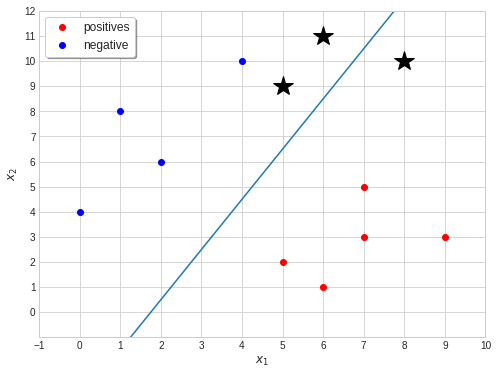

In [ ]:
plot_data(data)
w = model.w
t = model.t 
x = np.arange(-5,15)
plt.plot(x, -w[0] / w[1] * x + t / w[1])
for i in model.support_vectors:
  # marking the support vectors with star markers
  plt.plot(*i, marker='*', markersize=20, color='k')
plt.show()

Now let's the performance of the algorithm on the synthetic dataset without the labels.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xs[ys!=0], ys[ys!=0],
                                                    test_size=0.25,
                                                    random_state=0)
y_train[y_train == 2] = -1
y_test[y_test == 2] = -1

Hard-margin SVM (C=0) performs very badly on this dataset, it results in $46\%$ accuracy

In [ ]:
start = time.perf_counter()
model = SVM(C=0)
model.fit(X_train, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')

predictions = model.predict(X_test)
accuracy_score(predictions, y_test)

Time taken: 0.2184276170000885 sec


0.4666666666666667

But when we use regularization, things get much better.

In [ ]:
start = time.perf_counter()
model = SVM(C=0.01)
model.fit(X_train, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')

predictions = model.predict(X_test)
accuracy_score(predictions, y_test)

Time taken: 0.25901846100009607 sec


0.9933333333333333

In [ ]:
from svm_with_kernels import SupportVectorMachine
start = time.perf_counter()
model = SupportVectorMachine(C=0.01)
model.fit(X_train, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')

predictions = model.predict(X_test)
accuracy_score(predictions, y_test)

Time taken: 0.6114292339998428 sec


0.9933333333333333

We even reach to perfect classification when setting $C=1$. Think about the reasons why we get this kind of differences.

In [ ]:
start = time.perf_counter()
model = SVM(C=1)
model.fit(X_train, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')

predictions = model.predict(X_test)
accuracy_score(predictions, y_test)

Time taken: 0.29840802799935773 sec


1.0

Let's also check with `sklearn`'s implementation.

In [ ]:
from sklearn.svm import SVC

start = time.perf_counter()
model = SVC(C=1e-18, kernel='linear')
model.fit(X_train, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')

predictions = model.predict(X_test)
accuracy_score(predictions, y_test)

Time taken: 0.0062040329994488275 sec


0.4666666666666667

In [ ]:
start = time.perf_counter()
model = SVC(C=0.01, kernel='linear')
model.fit(X_train, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')

predictions = model.predict(X_test)
accuracy_score(predictions, y_test)

Time taken: 0.0013207480005803518 sec


0.9933333333333333

In [ ]:
start = time.perf_counter()
model = SVC(C=1, kernel='linear')
model.fit(X_train, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')

predictions = model.predict(X_test)
accuracy_score(predictions, y_test)

Time taken: 0.0013426389996311627 sec


1.0

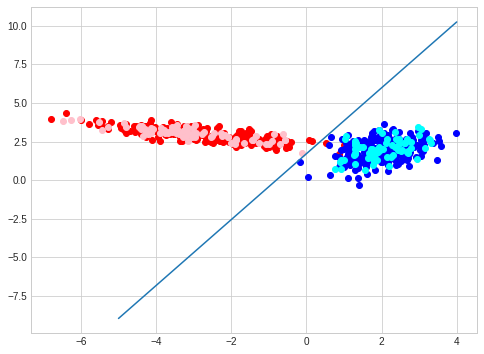

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train==-1,0], X_train[y_train==-1,1], color='red');
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='blue');

plt.scatter(X_test[y_test==-1,0], X_test[y_test==-1,1],
            color='pink');
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1],
            color='cyan');

w = model.w
t = model.t 
x = np.arange(-5,5)
plt.plot(x, -w[0] / w[1] * x + t / w[1])
plt.show()

## Linear vs Polynomial kernels

The goal of this task is to understand better how the choice of the kernel and the parameter values affect the performance of SVM. We will look at a two-dimensional dataset with a binary labels and two features:  $𝑥_1$  and  $𝑥_2$. The class labels are generated from the features using the XOR function, such that the class is positive when either  $𝑥_1>0$  or  $𝑥_2>0$  but not both. The following code creates this dataset and plots it.

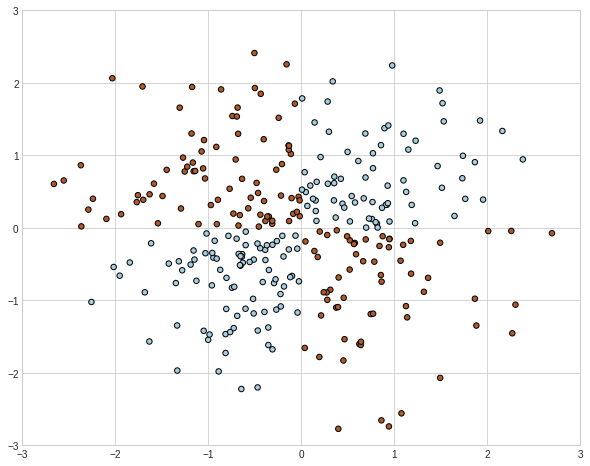

In [ ]:
np.random.seed(0)
train_X = np.random.randn(300, 2)
train_Y = np.logical_xor(train_X[:, 0] > 0, train_X[:, 1] > 0) * 1

plt.scatter(train_X[:, 0], train_X[:, 1], s=30, c=train_Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.axis([-3, 3, -3, 3])
plt.show()

Now let's fit an SVM with linear kernel on this dataset.

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel="linear")
svm_model.fit(train_X,train_Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
plt.style.use('default') 

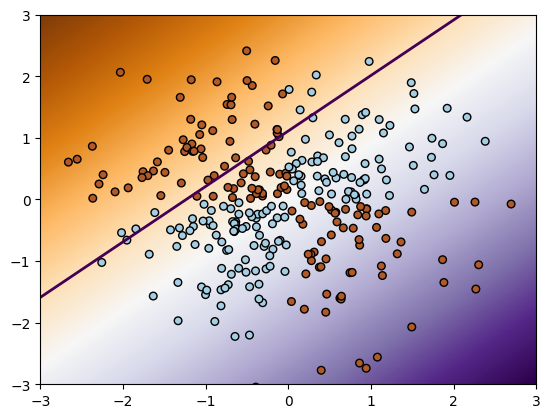

In [ ]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

def plot_svm(model, X, Y, ax = None):
    """
    Plots the decision function for each datapoint on the grid
    """
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    if ax is None:
        plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
                   origin='lower', cmap=plt.cm.PuOr_r)
        contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
        plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
                    edgecolors='k')
        plt.axis([-3, 3, -3, 3])
        plt.show()
    else:
        ax.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
        contours = ax.contour(xx, yy, Z, levels=[0], linewidths=2)
        ax.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
                    edgecolors='k')
        ax.axis([-3, 3, -3, 3])

plot_svm(svm_model, train_X, train_Y)

It was obvious that a linear decision boundary won't be able to separate these two classes. Now let's try SVM with polynomial kernel with degree 2 and 3.

In [ ]:
svm_model = SVC(kernel="poly", degree=2)
svm_model.fit(train_X, train_Y)   
print(f"""degree = {2}, 
accuracy : {accuracy_score(train_Y,svm_model.predict(train_X))*100} %""")

degree = 2, 
accuracy : 93.33333333333333 %


In [ ]:
svm_model = SVC(kernel="poly", degree=3)
svm_model.fit(train_X, train_Y)
print(f"""degree = {3}, 
accuracy : {accuracy_score(train_Y,svm_model.predict(train_X))*100} %""")

degree = 3, 
accuracy : 55.333333333333336 %


We can see that the polynomial kernel with degree 2 ourperforms the one with degree 3. Now let's see what is the reason behind this.

Which of the following features is the most useful in discriminating the two classes:  $𝑥_1 ,  𝑥_2 ,  𝑥_1^2 ,  𝑥_2^2 ,  𝑥_1^3 ,  𝑥_2^3 ,  𝑥_1𝑥_2 ,  𝑥_1^2𝑥_2 ,  𝑥_2^2𝑥_1$ ?

The visualizations below can give an idea about the suitable features. Note that the lighter colors represent hills (higher values) and darker colors are valleys (lower values).

In [ ]:
plt.style.use('default') 

plt.contour(xx, yy, xx*xx)
plt.title('$x_1^2$')
plt.show()

plt.contour(xx, yy, yy*yy)
plt.title('$x_2^2$')
plt.show()

plt.contour(xx, yy, xx**3)
plt.title('$x_1^3$')
plt.show()

plt.contour(xx, yy, yy**3)
plt.title('$x_2^3$')
plt.show()

plt.contour(xx, yy, xx*yy)
plt.title('$x_1 \cdot x_2$')
plt.show()

plt.contour(xx, yy, xx*xx*yy)
plt.title('$x_1^2\cdot x_2$')
plt.show()

plt.contour(xx, yy, yy*yy*xx)
plt.title('$x_1 \cdot x_2^2$')
plt.show()

We can see that $x_1\cdot x_2$ is the most needed to discriminate between the classes.

Now let's expand (open the brackets) the expression $\kappa(\mathbf{x},\mathbf{z})=\left(\mathbf{x}\cdot\mathbf{z}\right)^2,$ where 
$\mathbf{x}=(x_1, x_2)$ and $\mathbf{z}=(z_1, z_2)$ 

In [ ]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

x1, x2, z1, z2 = sp.symbols('x_1 x_2 z_1 z_2')
print(sp.expand( (x1*z1 +  x2*z2 )**2 ))

x_1**2*z_1**2 + 2*x_1*x_2*z_1*z_2 + x_2**2*z_2**2


We can see that the feature space $\phi(\mathbf{x})$ is constructed from the following features
$\phi(\mathbf{x})=(x_1^2, \sqrt2 x_1 \cdot x_2, x_2^2),$
because $\kappa(\mathbf{x},\mathbf{z})=\phi(\mathbf{x})\cdot\phi(\mathbf{z})$

Do you notice the best disciminator in this feature space?! 

Now let's look at the feature space constructed with the degree 3 polynomial kernel $\kappa(\mathbf{x},\mathbf{z})=\left(\mathbf{x}\cdot\mathbf{z}\right)^3$

In [ ]:
x1, x2, z1, z2 = sp.symbols('x_1 x_2 z_1 z_2')
print(sp.expand( (x1*z1 +  x2*z2 )**3 ))

x_1**3*z_1**3 + 3*x_1**2*x_2*z_1**2*z_2 + 3*x_1*x_2**2*z_1*z_2**2 + x_2**3*z_2**3


The corresponding transformation is the following
$\phi(\boldsymbol{x})=(x_1^3, \sqrt3 x_1^2 \cdot x_2, \sqrt3 x_1 \cdot x_2^2, x_2^3 )$ and we can see that the best discriminator is not present among the features.

Remember that the polynomial kernel is actually defined by $\kappa(\mathbf{x},\mathbf{z}) = (\mathbf{x}\cdot\mathbf{z}+r)^d$, but by default this $r$ is 0 (in sklearn's implementation). 

Let's take $r = 1$ and $d = 3$ and list the features in the constructed feature space $\phi(\mathbf{x})$ corresponding to this kernel. 

In [ ]:
x1, x2, z1, z2 = sp.symbols('x_1 x_2 z_1 z_2')
print(sp.expand( (x1*z1 +  x2*z2 + 1)**3 ))

x_1**3*z_1**3 + 3*x_1**2*x_2*z_1**2*z_2 + 3*x_1**2*z_1**2 + 3*x_1*x_2**2*z_1*z_2**2 + 6*x_1*x_2*z_1*z_2 + 3*x_1*z_1 + x_2**3*z_2**3 + 3*x_2**2*z_2**2 + 3*x_2*z_2 + 1


The transformation from the original feature space will look like this 
$\phi(\boldsymbol{x})=(x_1^3, \sqrt3 x_1^2 \cdot x_2, \sqrt3 x_1^2, \sqrt x_1 \cdot x_2^2, \sqrt6 x_1 \cdot x_2, \sqrt3 x_1 \cdot x_2^2, \sqrt3 x_2^2,\sqrt3 x_2 , 1 )$ and we can notice that the best discriminant feature is among the constructed features as $\sqrt{6}x_1\cdot x_2$.

Now let's try fitting the model with this kernel. 

degree = 3, 
accuracy : 96.33333333333334 %


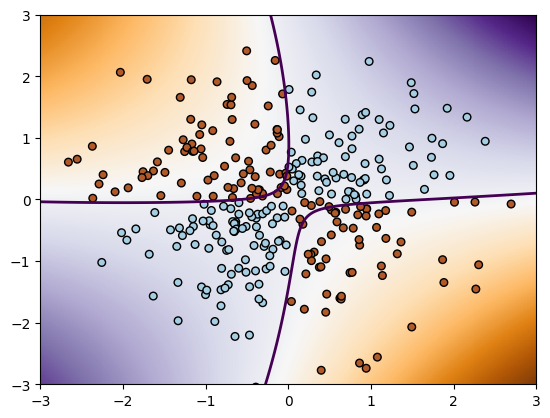

In [ ]:
svm_model = SVC(kernel="poly", degree=3, coef0=1)
svm_model.fit(train_X, train_Y)

print(f"""degree = {3}, 
accuracy : {accuracy_score(train_Y,svm_model.predict(train_X))*100} %""")
plot_svm(svm_model, train_X, train_Y)

We can see that the learning succeded in this case and we already saw why.

## Gaussian kernel

In this task we will make 6 plots and show how the RBF kernel works with different $C$ values: $0.1, 0.5, 1, 2, 10, 100$. 

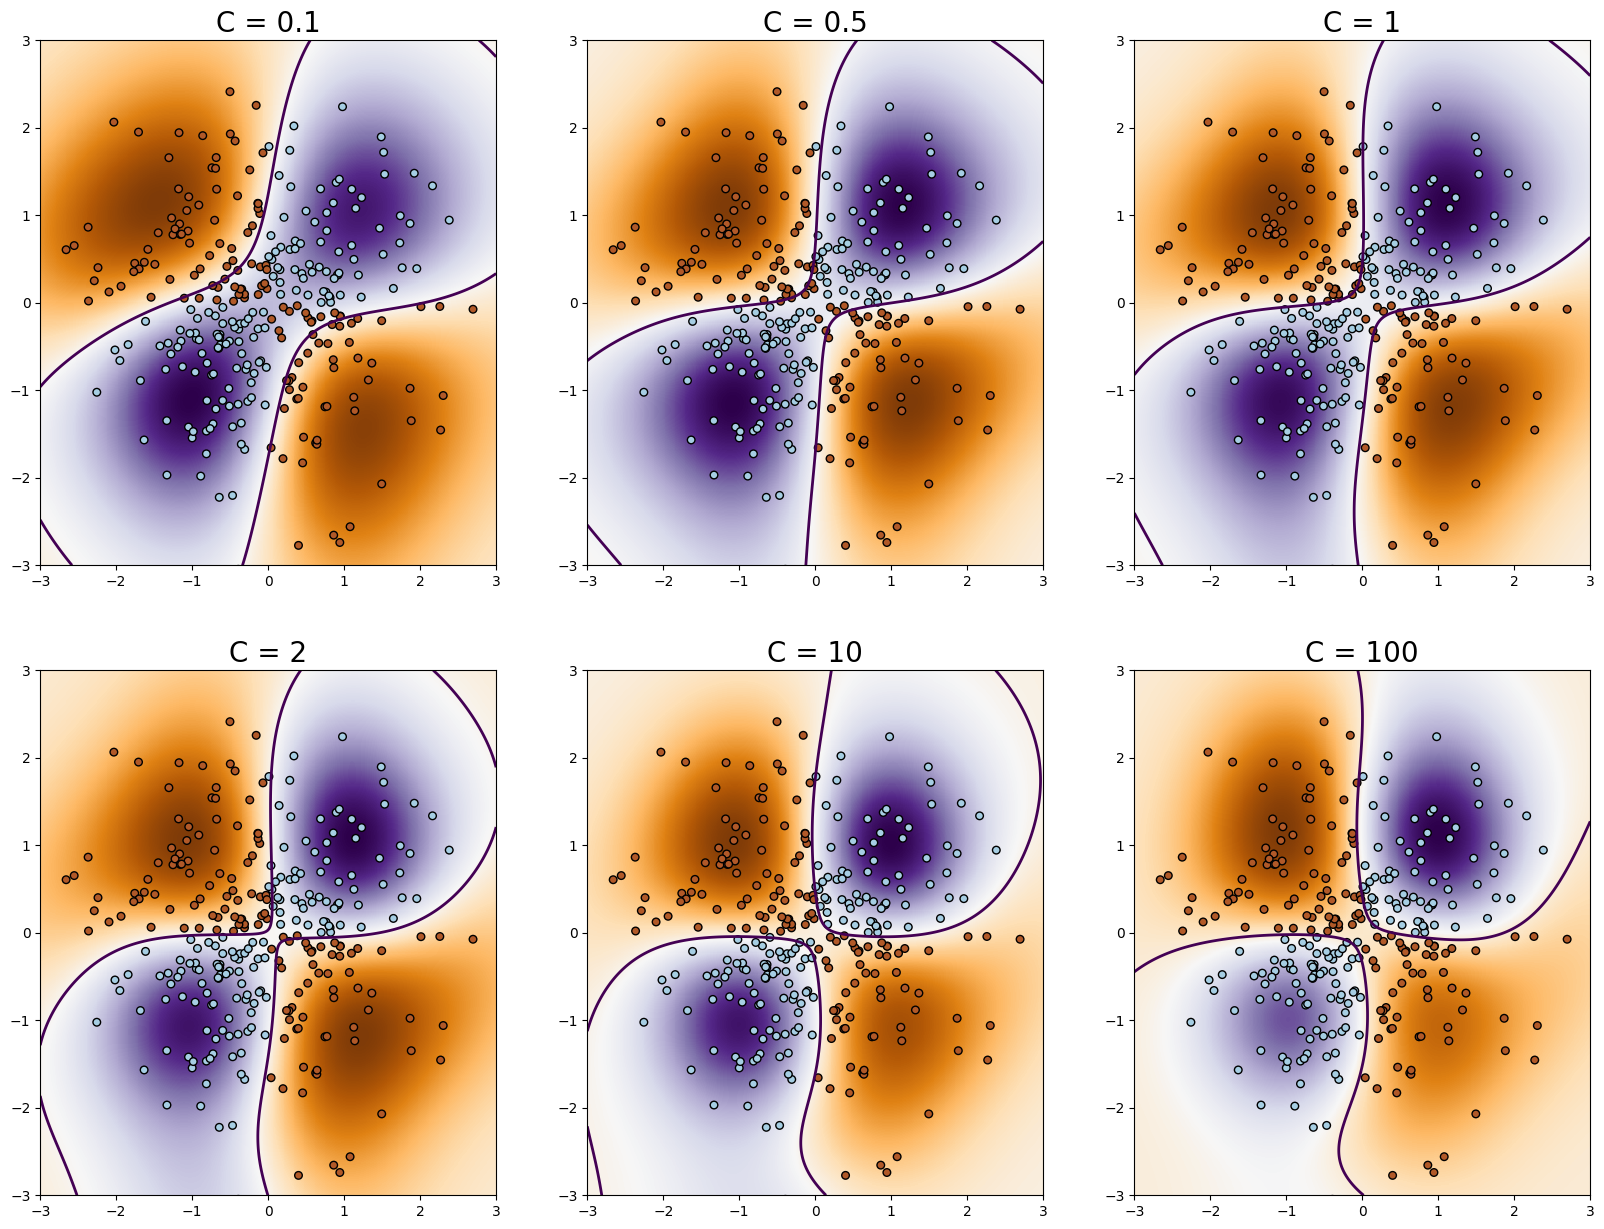

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(20,15))
    
for i, c in enumerate([0.1, 0.5, 1, 2, 10, 100]):
    svm_model = SVC(kernel="rbf", C=c)
    svm_model.fit(train_X, train_Y)
    ax[i//3][i if i-3 < 0 else i-3].set_title(f'C = {c}', fontsize=20)
    plot_svm(svm_model, train_X, train_Y, ax = ax[i//3][i if i-3<0 else i-3])

What do you observe? What does parameter C do?

Now let's change the gamma parameter: $0.01, 0.5, 1, 2, 10, 100$ and do the same as in the previous case.  $\gamma=\frac{1}{2\sigma}$ in the Gaussian kernel formula.

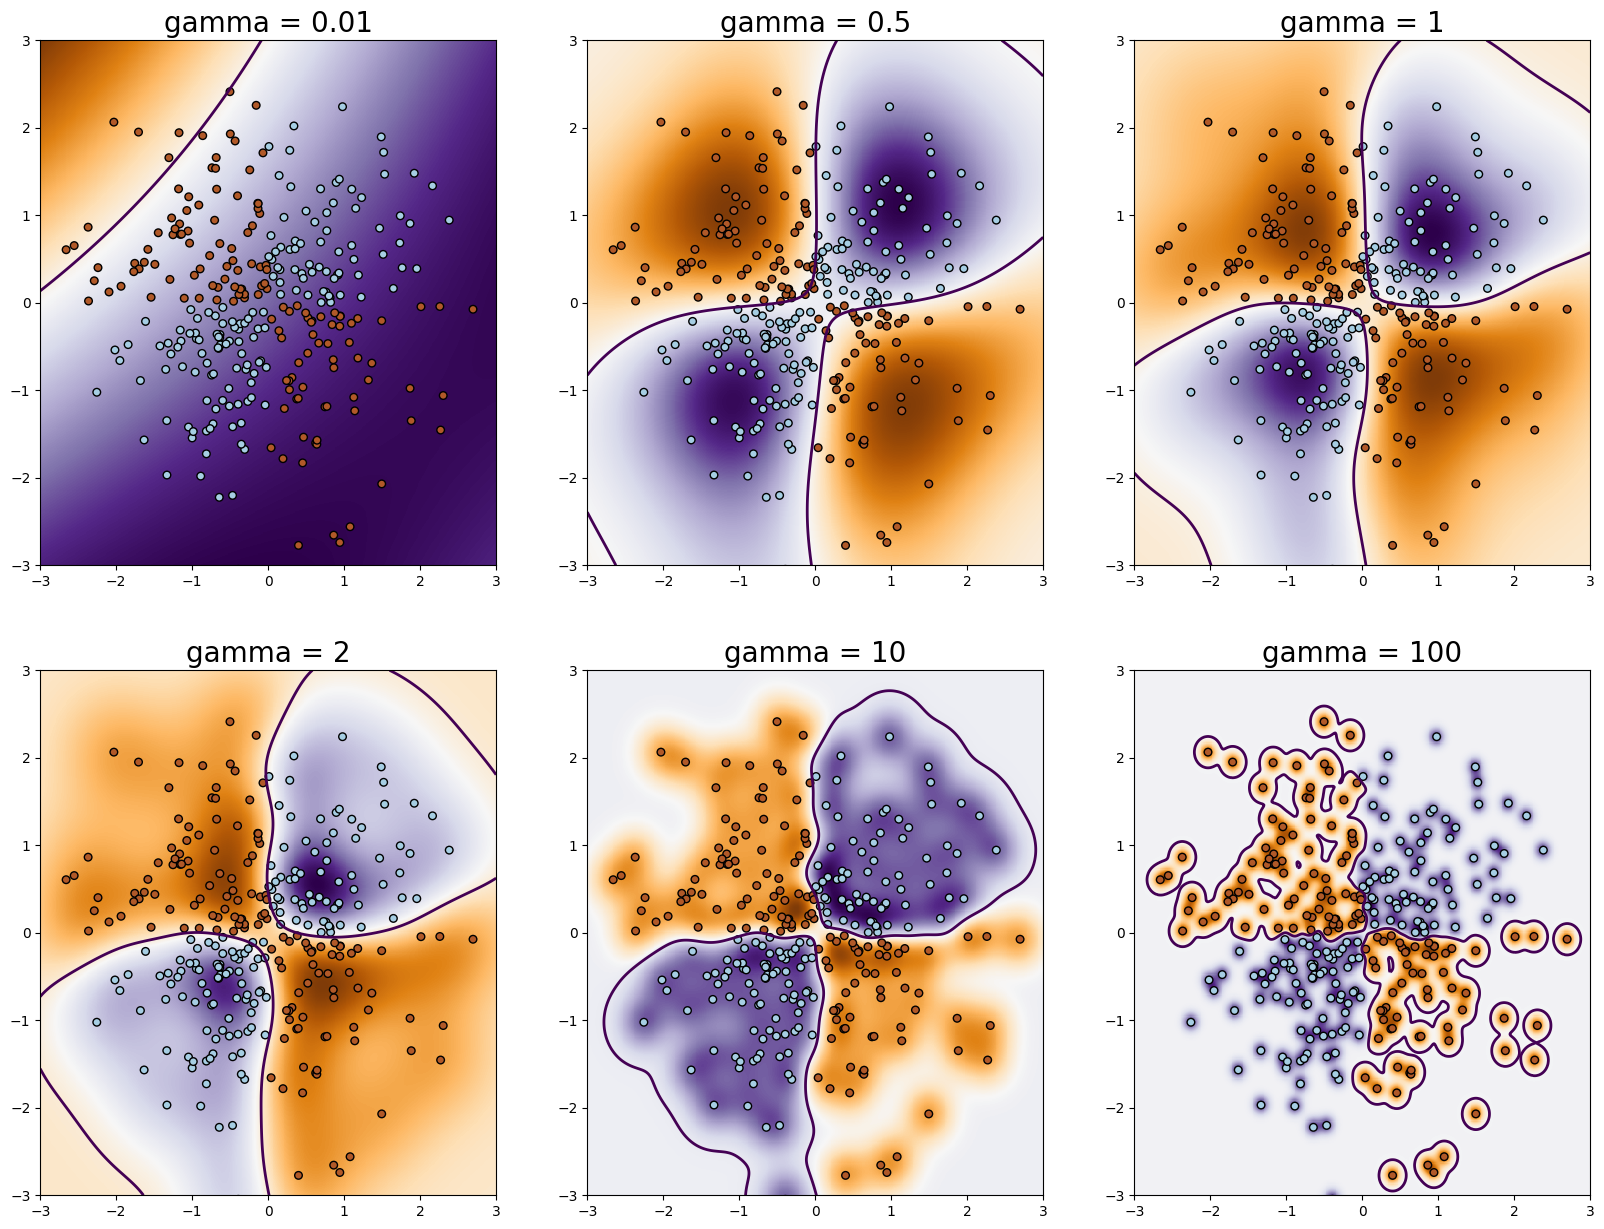

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(20,15))

for i, c in enumerate([0.01,0.5,1,2,10,100]):
    svm_model = SVC(kernel="rbf", gamma=c)
    svm_model.fit(train_X, train_Y)
    ax[i//3][i if i-3<0 else i-3].set_title(f'gamma = {c}', fontsize=20)
    plot_svm(svm_model, train_X, train_Y, ax = ax[i//3][i if i-3<0 else i-3])


What does the gamma parameter do?